In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
from pymc.Matplot import plot as pmplot

sns.set()

In [2]:
dick = pd.read_pickle('country_data.pkl')

def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                        thousands=',',converters={0 : strip})



In [3]:
US = pd.read_pickle('us_state_dict.pkl')
ny = US['New York']
ny.index = pd.DatetimeIndex(ny.index)

dick['New York'] = ny
ny

,confirmed,deceased,inc,dead_inc,factor,dead_factor,density,gdp,pct_dead,conf_per_M,dead_per_M
2020-03-14,525.0,2.0,104.0,2.0,1.247031,NaN,1068.424744,89076,0.380952,27.005521,0.102878
2020-03-15,732.0,3.0,207.0,1.0,1.394286,1.500000,1068.424744,89076,0.409836,37.653413,0.154317
2020-03-16,967.0,10.0,235.0,7.0,1.321038,3.333333,1068.424744,89076,1.034126,49.741598,0.514391
2020-03-17,1706.0,13.0,739.0,3.0,1.764219,1.300000,1068.424744,89076,0.762016,87.755085,0.668708
2020-03-18,2495.0,16.0,789.0,3.0,1.462485,1.230769,1068.424744,89076,0.641283,128.340525,0.823025
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05,376208.0,30236.0,1075.0,62.0,1.002866,1.002055,1068.424744,89076,8.037043,19351.796502,1555.312272
2020-06-06,377316.0,30280.0,1108.0,44.0,1.002945,1.001455,1068.424744,89076,8.025104,19408.791012,1557.575591
2020-06-07,378097.0,30374.0,781.0,94.0,1.002070,1.003104,1068.424744,89076,8.033388,19448.964940,1562.410866
2020-06-08,378799.0,30417.0,702.0,43.0,1.001857,1.001416,1068.424744,89076,8.029852,19485.075180,1564.622746


In [4]:
ita = dick['Italy']
us = dick['US']
swe =dick['Sweden']
ita.tail(60)

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-04-11,152271,1.031807,4694.0,19468,1.032840,619.0,12.785100,7.821605,1.001001
2020-04-12,156363,1.026873,4092.0,19899,1.022139,431.0,12.726156,7.857832,0.995390
2020-04-13,159516,1.020165,3153.0,20465,1.028444,566.0,12.829434,7.794576,1.008115
2020-04-14,162488,1.018631,2972.0,21067,1.029416,602.0,12.965265,7.712916,1.010587
2020-04-15,165155,1.016414,2667.0,21645,1.027436,578.0,13.105870,7.630169,1.010845
2020-04-16,168941,1.022924,3786.0,22170,1.024255,525.0,13.122925,7.620253,1.001301
2020-04-17,172434,1.020676,3493.0,22745,1.025936,575.0,13.190554,7.581183,1.005154
2020-04-18,175925,1.020245,3491.0,23227,1.021191,482.0,13.202785,7.574159,1.000927
2020-04-19,178972,1.017320,3047.0,23660,1.018642,433.0,13.219945,7.564328,1.001300
2020-04-20,181228,1.012605,2256.0,24114,1.019189,454.0,13.305891,7.515468,1.006501


In [5]:
countries = ['Sweden','Italy','Spain','US','New York','Germany',
             'Netherlands','Turkey']

dead_df = pd.DataFrame()

for c in countries:
    country = pd.DataFrame(dick[c])
    D = pd.DataFrame(country['dead_inc'])
    
    D['dead_inc'] = D['dead_inc'] / (country_populations.loc[c,'population'] / 1e6)
    
    D.reset_index(inplace=True,drop=True)
    
    zero_or_nan = (D.ne(0) & ~D.isna())
    
    first_non_zero = zero_or_nan.idxmax().values[0]
    
    D = D.loc[first_non_zero:]
    
    D.reset_index(inplace=True,drop=True)
    
    D.rename(columns={'dead_inc' : c},inplace=True)
    
    dead_df = pd.concat([dead_df,D],axis=1)


dead_df.tail(100)


,Sweden,Italy,Spain,US,New York,Germany,Netherlands,Turkey
10,0.396068,0.297709,1.668279,0.018127,2.673522,0.190967,0.233442,0.201567
11,0.099017,0.446563,1.326068,0.024169,3.856041,0.274516,1.108850,0.189710
12,0.396068,0.463102,2.010490,0.018127,5.141388,0.202903,0.875408,0.272709
13,1.089188,0.678114,1.133574,0.024169,7.300771,0.119355,1.108850,0.438705
14,2.574445,0.810429,4.085144,0.030211,10.334190,0.346128,1.750816,0.545417
...,...,...,...,...,...,...,...,...
105,NaN,1.405846,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,1.190834,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,0.876586,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,1.075059,NaN,NaN,NaN,NaN,NaN,NaN


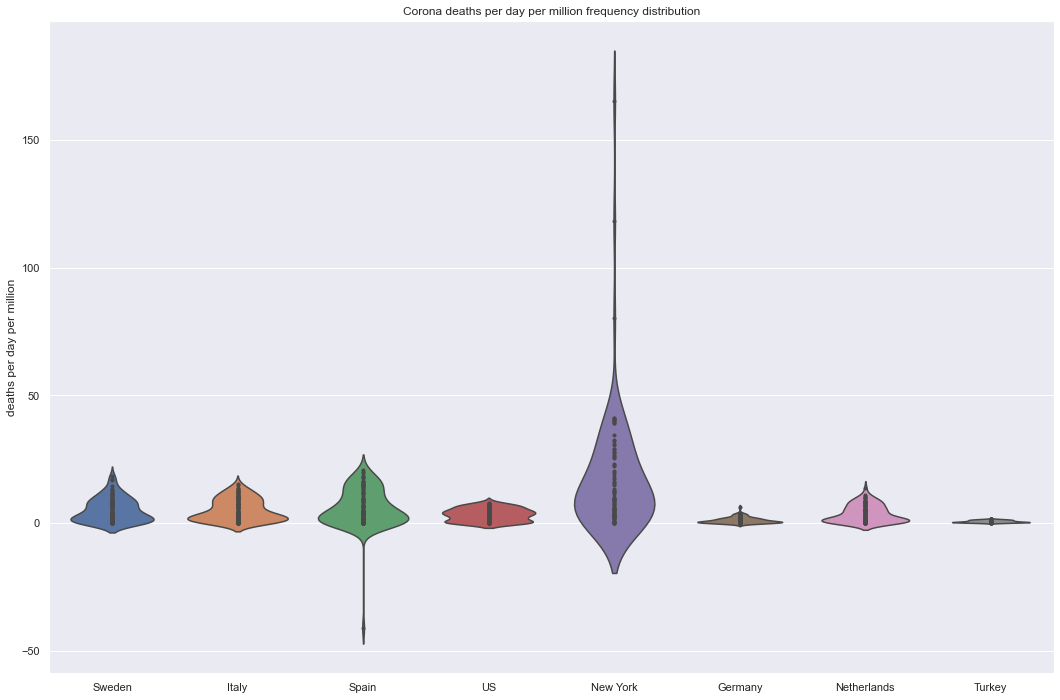

In [6]:
sns.set()
sns.set_style('darkgrid')

plt.figure(figsize=(18,12))
plt.title('Corona deaths per day per million frequency distribution')
plt.ylabel('deaths per day per million')

sns.violinplot(data=dead_df,scale='count',inner='point')
plt.savefig('violin_plot_deaths_per_day.jpg',format='jpg')

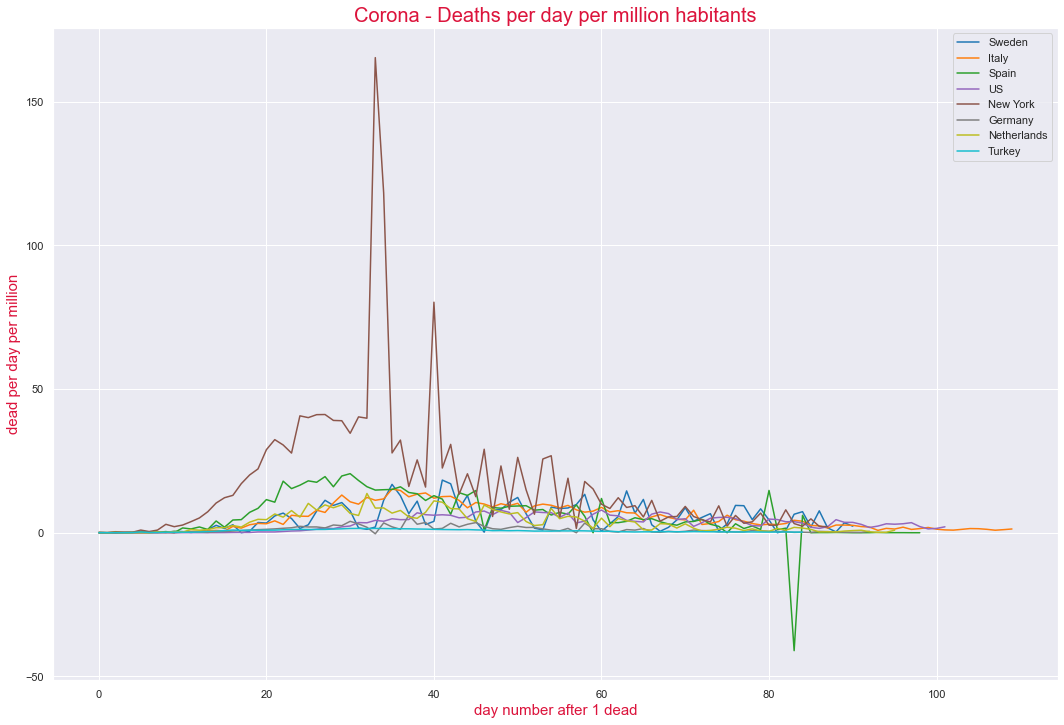

In [7]:
#plt.style.use('whitegrid')
sns.set_style('darkgrid')
dead_df.plot(figsize=(18,12),colormap='tab10')
plt.title('Corona - Deaths per day per million habitants',color='crimson',size=20)
plt.xlabel('day number after 1 dead',color='crimson',size=15)
plt.ylabel('dead per day per million',color='crimson',size=15)
plt.savefig('deaths_per_M_per_day.jpg',format='jpg')


/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encou

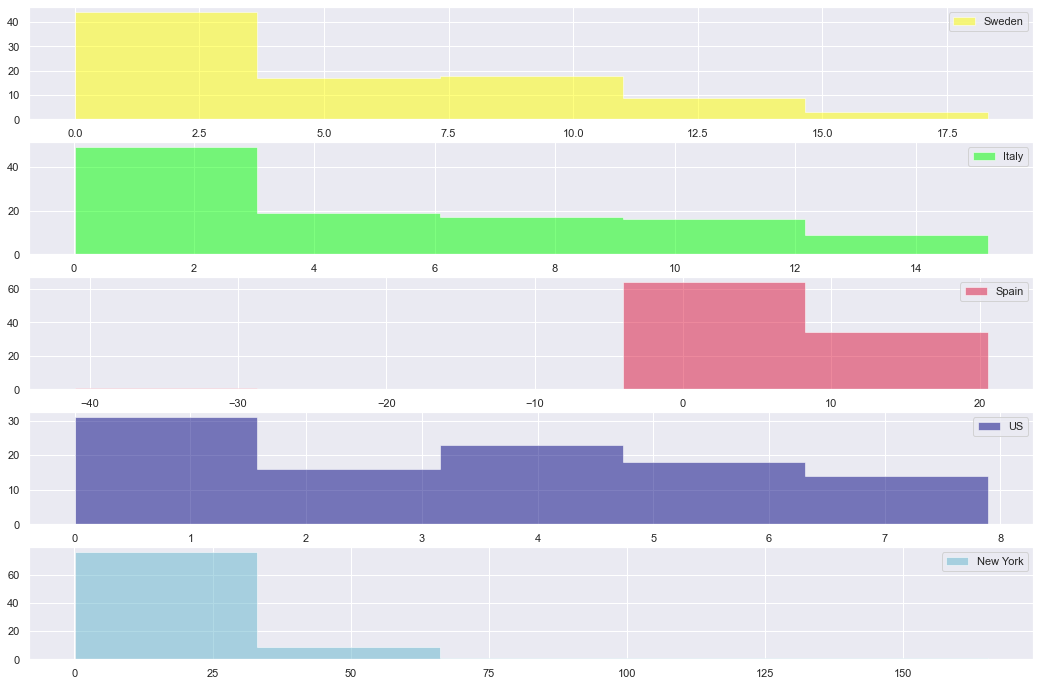

In [8]:
plt.figure(figsize=(18,12))
bins = 5
plt.subplot(511)
plt.hist(dead_df['Sweden'],histtype='stepfilled',color='yellow',alpha=0.5,label='Sweden',bins=bins)
plt.legend(loc='upper right')
plt.subplot(512)
plt.hist(dead_df['Italy'],histtype='stepfilled',color='lime',alpha=0.5,label='Italy',bins=bins)
plt.legend(loc='upper right')
plt.subplot(513)
plt.hist(dead_df['Spain'],histtype='stepfilled',color='crimson',alpha=0.5,label='Spain',bins=bins)
plt.legend(loc='upper right')
plt.subplot(514)
plt.hist(dead_df['US'],histtype='stepfilled',color='navy',alpha=0.5,label='US',bins=bins)
plt.legend(loc='upper right')
plt.subplot(515)
plt.hist(dead_df['New York'],histtype='stepfilled',color='c',alpha=0.5,label='New York',bins=bins)
plt.legend(loc='upper right')